# class <br>
这里self指的是class本身。name是外界的值，传入到class里面，然后在class的各个函数之间通用。
        

In [41]:
class Person(object):
    def __init__(self, name):
        self.name = name 
        print(self.name)
    
    def say_something(self):
        print('I am {}. hello'.format(self.name))
        self.run(5)
        
    def run(self, num): # num只在这里用了，还是内部的值，不用self
        print('run' * num)
    
    def __del__(self): #　其实在每次程序结束的时候都会自动删除
        print('good bye')
    
person = Person('Mike')
person.say_something()
person.speak = True # 可以在object中添加method，但最好不要乱加


del person # 一般的py文件是自动执行。

Mike
I am Mike. hello
runrunrunrunrun
good bye


overriding 可以替代母class的method<br>
_enable_auto_run: 前导单下划线定义的变量：命名，方便。 <br>
__enable_auto_run: 前导双下划线定义的变量：在class的object中不能调用，在class内部可以调用。不过还是少用吧。<br>
解决方法：在外界object中增加method，但还是别乱加。<br>
多态：有toyata的汽车和tesla的汽车。


In [48]:
import abc # abstract class

class Pesron(metaclass=abc.ABCMeta):
    def __init__(self, age=1):
        self.age =age
    
    @abc.abstractmethod #被设定为抽象行为的函数，在继承时候一定要有。
    def drive(self):
        if self.age >= 18:
            print('ok')
        else:
            raise Exception('No dive')

class Baby(Person):
    def __init__(self, age=1):
        if age < 18:
            super().__init__(age)
        else:
            raise ValueError

    def drive(self): # 一定要有。
        raise Exception('No drive')

class Adult(Person):
    def __init__(self, age=18):
        if age >= 18:
            super().__init__(age)
        else:
            raise ValueError

    def drive(self): # 一定要有。
        print('ok')

baby = Baby()
adult = Adult()
        
class Car(object):
    def __init__(self, model=None):
        self.model = model
    def run(self):
        print('run')
    def ride(self, person): # duck type 
        person.drive()
        
class ToyotaCar(Car):
    def run(self): # 替代了上面的run overriding
        print('fast')
        
class TeslaCar(Car):
    def __init__(self, model='Model S',
                 enable_auto_run=False,
                 passwd='123'):
        #self.model = model
        super().__init__(model) # 在继承的基础上
        self._enable_auto_run = enable_auto_run # 添加一个新的
        self.passwd = passwd
        #self.__passwd = passwd
        
    @property
    def enable_auto_run(self):
        return self._enable_auto_run
    # tesla_car.enable_auto_run = True 无法运行，因为property无法修改。
    
    @enable_auto_run.setter # 只在条件允许的情况下更改
    def enable_auto_run(self, is_enable):
        if self.passwd == '123':
            self._enable_auto_run = is_enable
        #self.__passwd = None # 在class内部可以调用
        
    def run(self):
        print('super fast')
        
    def auto_run(self):
        print('auto run')
        
        
car = Car()
car.run()
car.ride(adult)

toyota_car = ToyotaCar('Lexus')
print(toyota_car.model)
toyota_car.run()
tesla_car = TeslaCar('Model S', passwd='123')
print(tesla_car.model)
tesla_car.run()

tesla_car.enable_auto_run = True # 在单独property的情况下不能改
# tesla_car.__passwd 在object中调用不了

1
good bye
18
good bye
run
ok
Lexus
fast
Model S
super fast


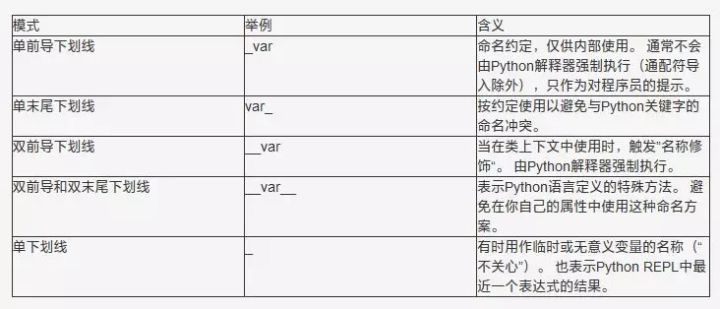

鸭子类型：当看到一只鸟走起来像鸭子、游泳起来像鸭子、叫起来也像鸭子，那么这只鸟就可以被称为鸭子。

In [50]:
class Duck:
    def __init__(self, name):
        self.name = name

    def quack(self):
        print("gua gua")


class Man:
    def __init__(self, name):
        self.name = name

    def quack(self):
        print("女王大人")


def do_quack(ducker): # 不关心class是什么，只要有quack功能就行。
    ducker.quack()


if __name__ == '__main__':
    d = Duck('duck')
    m = Man('man')
    do_quack(d)
    do_quack(m)


gua gua
女王大人


还可以进行多重继承.<br>
class PersonCarRobot(Car, Person):,但继承的class中尽量不要有相同名称的method.
    

一般变量会在多个objetc中公用，不要乱改。

In [55]:
class T(object):
    
    kind = 'human' #不要乱改
    # words = [] 用这个的话就公用了
    
    def __init__(self):
        self.words = []
    
    def add_word(self, word):
        self.words.append(word)

        
c = T()
c.add_word('1')
c.add_word('2')
print(c.words)

d = T()
d.add_word('3')
d.add_word('4')
print(d.words)

['1', '2']
['3', '4']


不建立object也可以调用method。<br>
classmethod 是调用。类方法。用class调用object。<br>
staticmethod是类里面的一个静态方法，跟普通函数没什么区别，与类和实例都没有所谓的绑定关系，它只不过是碰巧存在类中的一个函数而已。不论是通过类还是实例都可以引用该方法

In [60]:
class Person(object):
    
    kind = 'human'
    
    def __init__(self):
        self.x = 100
        
    @classmethod
    def what_is_your_kind(cls):
        return cls.kind
    
    @staticmethod
    def about(year):
        print('about human {}'.format(year))

# 一般用法
a = Person()
print(a.what_is_your_kind())

# 直接调用
print(Person.kind) 
print(Person.what_is_your_kind)
Person.about(1999)

human
human
<bound method Person.what_is_your_kind of <class '__main__.Person'>>
about human 1999


特殊的method。方便调用。

In [65]:
class Word(object):
    
    def __init__(self, text):
        self.text = text
    
    def __str__(self):
        return 'Word!!!!'
    
    def __len__(self):
        return len(self.text)
    
    def __add__(self, word):
        return self.text.lower() + word.text.lower()
    
    def __eq__(self, word):
        return self.text.lower() == word.text.lower()

w = Word('test')
w2 = Word('test')

print(len(w))
# print(len(w.text)) 这个就不需要啦
print(w + w2)
print(w == w2)

4
testtest
True


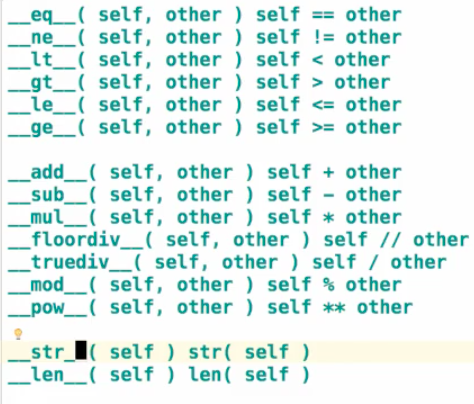